## CLASIFICACION A - Regresion logistica

### PASO 1 - Importo las librerias

In [26]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

### PASO 2 - Cargo el dataframe

In [27]:
dataframe = pd.read_csv("titanic_processed.csv", encoding="ISO-8859-1")
dataframe

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,0,0,7.8958,0,0,1
1,1,3,0,26.0,0,0,7.9250,0,0,1
2,0,3,1,27.0,0,0,7.8958,0,0,1
3,0,2,1,32.0,2,0,73.5000,0,0,1
4,0,3,1,65.0,0,0,7.7500,0,1,0
...,...,...,...,...,...,...,...,...,...,...
707,0,3,1,22.0,0,0,8.0500,0,0,1
708,1,1,1,35.0,0,0,26.2875,0,0,1
709,0,3,1,21.0,0,0,8.4333,0,0,1
710,0,3,1,25.0,0,0,7.2250,1,0,0


In [28]:
# Creamos una copia para trabajar

dataset = dataframe.copy()
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,0,0,7.8958,0,0,1
1,1,3,0,26.0,0,0,7.9250,0,0,1
2,0,3,1,27.0,0,0,7.8958,0,0,1
3,0,2,1,32.0,2,0,73.5000,0,0,1
4,0,3,1,65.0,0,0,7.7500,0,1,0


### PASO 3 - Limpieza de los datos

In [29]:
# Elimino los posibles errores NaN

dataset = dataset.dropna()
dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,0,0,7.8958,0,0,1
1,1,3,0,26.0,0,0,7.9250,0,0,1
2,0,3,1,27.0,0,0,7.8958,0,0,1
3,0,2,1,32.0,2,0,73.5000,0,0,1
4,0,3,1,65.0,0,0,7.7500,0,1,0
...,...,...,...,...,...,...,...,...,...,...
707,0,3,1,22.0,0,0,8.0500,0,0,1
708,1,1,1,35.0,0,0,26.2875,0,0,1
709,0,3,1,21.0,0,0,8.4333,0,0,1
710,0,3,1,25.0,0,0,7.2250,1,0,0


### PASO 4 - Separo los datos - Labels

In [30]:
# Separo los datos de entrada y de salida

x_data = dataset.copy()
y_data = dataset.pop("Survived")
x_data.pop("Survived")

0      0
1      1
2      0
3      0
4      0
      ..
707    0
708    1
709    0
710    0
711    0
Name: Survived, Length: 712, dtype: int64

### PASO 5 - Divido los datos de entrenamiento y de testeo

In [31]:
# Decido dividir los datos de entrenamiento y testeo en 80/20 respectivamente

x_entrenar, x_test, y_entrenar, y_test=train_test_split(x_data, y_data, test_size=0.2)

print("Porcentaje de datos de entrenamiento:", len(x_entrenar)*100/(len(x_entrenar)+len(x_test)))
print("Porcentaje de datos de test_________:", len(x_test)*100/(len(x_entrenar)+len(x_test)))

print(x_entrenar.shape)
print(y_entrenar.shape)
print(x_test.shape)
print(y_test.shape)

Porcentaje de datos de entrenamiento: 79.91573033707866
Porcentaje de datos de test_________: 20.084269662921347
(569, 9)
(569,)
(143, 9)
(143,)


### PASO 6 - Planteo y evaluo el modelo de regresion logica

In [32]:
clasificador = linear_model.LogisticRegression(solver='lbfgs', C=100, max_iter=1000, random_state=0)
clasificador.fit(x_entrenar, y_entrenar)

LogisticRegression(C=100, max_iter=1000, random_state=0)

In [33]:
prediccion_entrena = clasificador.predict(x_entrenar)
print(prediccion_entrena)

[1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0
 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0
 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0
 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0
 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0
 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1
 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0
 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0
 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1
 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0
 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0
 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 1 0 1 0 1 0 0 0 0 

In [34]:
# Verificacion de Accuracy

print("Accuracy")
print(f"Precision de testeo {clasificador.score(x_test, y_test)}")
print(f"Precision de entrenamiento {clasificador.score(x_entrenar, y_entrenar)}")

Accuracy
Precision de testeo 0.8181818181818182
Precision de entrenamiento 0.804920913884007


In [35]:
prediccion_test = clasificador.predict(x_test)
print("Prediccion Testeo")
print(prediccion_test)
print("Datos reales de Testeo")
print(np.array(y_test))

Prediccion Testeo
[0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0
 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0]
Datos reales de Testeo
[0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 1
 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0
 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0]


### PASO 7 - Grafico la relacion de datos de prueba y la prediccion

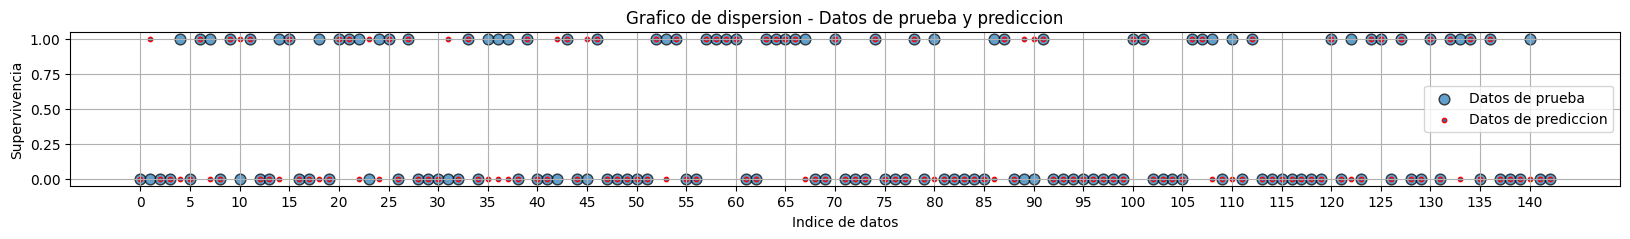

In [36]:
plt.figure(figsize=(20, 2))
x = np.arange(len(y_test))
label_x = np.arange(0, len(y_test), 5)
plt.scatter(x,y_test, alpha=0.7, marker="o", s=60, facecolor="C0", edgecolor="k", label="Datos de prueba")

plt.scatter(x,prediccion_test, alpha=1, marker="o", s=10, facecolor="C10", edgecolor="r", label="Datos de prediccion")

plt.title("Grafico de dispersion - Datos de prueba y prediccion")
plt.legend()
plt.grid()
plt.xticks(label_x)

plt.xlabel("Indice de datos")
plt.ylabel("Supervivencia")
    
plt.show()

### PASO 8 - Conclusiones

He hecho pruebas para lograr una mayor eficacia de clasificacion del modelo. Probe subiendo y bajando la proporcion de la seleccion de aprendizaje y de prueba, llegando a la conclusion que el mejor desempeño estaba en la proporcion 80/20.
Ya que con mayor datos de aprendizaje se logra una mejor prediccion. Y esto se ve claro en la gran coincidencia de puntos azules u rojos en el grafico.

----
## CLASIFICACION B - Arboles de decision.

### PASO 1 - Importo las librerias necesarias

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

### PASO 2 - Muestro datos de entrenamiento y testeo (Continuo con la seleccion realizada para la Clasificacion A)

In [38]:
# Verifico los datos de entrada para entrenamiento

x_entrenar.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
58,3,0,21.0,0,0,7.6500,0,0,1
697,3,0,37.0,0,0,9.5875,0,0,1
344,1,1,24.0,0,0,79.2000,1,0,0
168,3,0,45.0,0,0,7.7500,0,0,1
527,2,1,36.5,0,2,26.0000,0,0,1


In [39]:
# Verifico los datos de salida para entrenamiento

y_entrenar.head()

58     1
697    0
344    0
168    0
527    0
Name: Survived, dtype: int64

In [40]:
# Verifico los datos de entrada para testeo

x_test.tail()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
376,3,1,26.0,0,0,8.0500,0,0,1
35,3,1,26.0,0,0,7.7750,0,0,1
263,3,1,4.0,1,1,11.1333,0,0,1
611,2,1,46.0,0,0,26.0000,0,0,1
709,3,1,21.0,0,0,8.4333,0,0,1


In [41]:
# Verifico los datos de salida para testeo

y_test.tail()

376    0
35     0
263    1
611    0
709    0
Name: Survived, dtype: int64

In [42]:
# Porcentaje de seleccion de datos

print("Porcentaje de datos de entrenamiento:", len(x_entrenar)*100/(len(x_entrenar)+len(x_test)))
print("Porcentaje de datos de test_________:", len(x_test)*100/(len(x_entrenar)+len(x_test)))

Porcentaje de datos de entrenamiento: 79.91573033707866
Porcentaje de datos de test_________: 20.084269662921347


### PASO 3 - Creo el objeto arbol y lo ajusto

In [43]:
# Creacion del arbol de decision y declaracion de la profundidad

arbol_decision=DecisionTreeClassifier(max_depth=3)

In [44]:
# Ajuste del arbol con los datos de entrenamiento

arbol_decision.fit(x_entrenar, y_entrenar)

DecisionTreeClassifier(max_depth=3)

### PASO 4 - Realizo la prediccion con score

In [45]:
# Prediccion desde los datos de testeo

print(f"Precision de testeo {arbol_decision.score(x_test, y_test)}")

Precision de testeo 0.8321678321678322


In [46]:
# Verifico que no haya sobre entrenamiento del modelo

print(f"Precision de entrenamiento {arbol_decision.score(x_entrenar, y_entrenar)}")

Precision de entrenamiento 0.8154657293497364


### PASO 5 - Grafico el arbol de decision (Graphviz)

In [47]:
# Genero una lista con los titulos de las columnas de datos de entrada

feature = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked_C", "Embarked_Q", "Embarked_S"]

In [48]:
# Exportacion del grafico con el modulo Graphviz

export_graphviz(arbol_decision, out_file="arbol_titanic.dot", class_names=["No sobrevive", "Sobrevive"], feature_names=feature, impurity=False, filled=True)

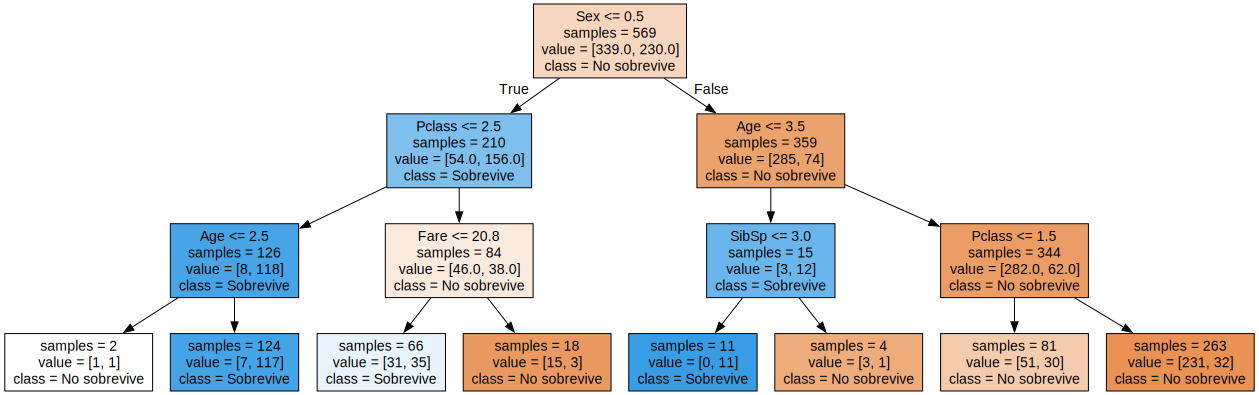

In [49]:
# Leo el grafico exportado

with open("arbol_titanic.dot") as tree:
    dot_graph=tree.read()
graphviz.Source(dot_graph)

### PASO 6 - Analisis del resultado (feature_importances_)

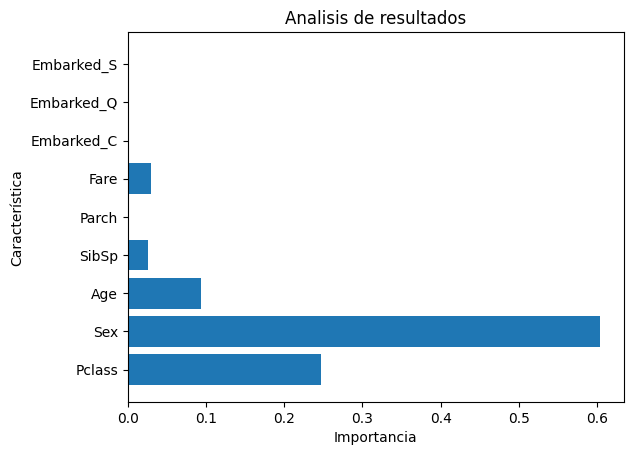

In [50]:
# Armo un grafico para analizar que caracteristicas fueron mas predominantes para hacer la clasificacion de la data

feature_len=len(feature)

plt.barh(range(feature_len),arbol_decision.feature_importances_)
plt.yticks(np.arange(feature_len),feature)
plt.title("Analisis de resultados")
plt.xlabel("Importancia")
plt.ylabel("Característica")
plt.show()

### PASO 7 - Conclusiones

En este metodo de clasificacion se continuo con los datos ya seleccionado en el anterior para aprendizaje y prueba. Al darle la profundidad del arbol hice pruebas con 4 capas y 3 capas, quedandome con la segunda alternativa. Ya que me parecia que eran suficientes y que el desempeño del modelo cumplia con mayor precision que con 4 capas.
Al ver el grafico de analisis de resultados parece muy creible, basandose en las reglas de los navios donde los primeros que evacuan son los niños/as y las mujeres y que en las clases altas hay disponibilidad de mas botes salvavidas, se puede ver que los datos que marcan la mayor informacion para clasificar los resultados son el sexo, la clase y la edad.